**Ξεκινώ με την εξόρυξη δεδομένων από το Twitter του Πρώτου Θέματος**

*Επειδή θέλω να αναζητήσω όλα τα σχετικά άρθρα με τη λέξη "εμβολιασμός" θα χρησιμοποιήσω τον παρακάτω κώδικα*

In [ ]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = ""
CONSUMER_SECRET = ""
OAUTH_TOKEN = ""
OAUTH_TOKEN_SECRET = ""
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweets = []
MAX_ATTEMPTS = 40
COUNT_OF_TWEETS_TO_BE_FETCHED = 3800 

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        print("We Got ", len(tweets), " tweets!!!")
        break # we got the  tweets... !!

    #----------------------------------------------------------------#
    # STEP 1: Query Twitter
    # STEP 2: Save the returned tweets
    # STEP 3: Get the next max_id
    #----------------------------------------------------------------#

    # STEP 1: Query Twitter
    if(0 == i):
        # Query twitter for data. 
        results = twitter.search(q="εμβολιασμός",count='100')
        print("I Got:", len(results['statuses']), " tweets")
    else:
        # After the first call we should have max_id from result of previous call. Pass it in query.
        results = twitter.search(q="covid19",count='100', include_entities='true',max_id=next_max_id)
        print("I Got:", len(results['statuses']), " tweets")


    # STEP 2: Save the returned tweets
    for result in results['statuses']:
#        tweet_text = result['text']
        tweets.append(result)


    # STEP 3: Get the next max_id
    try:
        # Parse the data returned to get max_id to be passed in consequent call.
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        # No more next pages
        break

I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
We Got  3900  tweets!!!


In [ ]:
results['search_metadata']

{'completed_in': 0.135,
 'count': 100,
 'max_id': 1410902138172035072,
 'max_id_str': '1410902138172035072',
 'next_results': '?max_id=1410902018596564991&q=covid19&count=100&include_entities=1',
 'query': 'covid19',
 'refresh_url': '?since_id=1410902138172035072&q=covid19&include_entities=1',
 'since_id': 0,
 'since_id_str': '0'}

In [ ]:
results['statuses']

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Fri Jul 02 10:04:17 +0000 2021',
  'entities': {'hashtags': [{'indices': [100, 108], 'text': 'COVID19'}],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 781235054919946240,
     'id_str': '781235054919946240',
     'indices': [3, 15],
     'name': '𝐏𝐌𝐏 🌐 𝐌𝐚𝐠𝐚𝐳𝐢𝐧𝐞',
     'screen_name': 'PMPmagToday'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 1410902137949900800,
  'id_str': '1410902137949900800',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'place': None,
  'retweet_count': 2,
  'retweeted': False,
  'retweeted_status': {'contributors': None,
   'coordinates': None,
   'created_at': 'Thu Jul 01 23:17:16 +0000 2021',
   'entities': {'hashtags': [{

In [ ]:
tweets_df = pd.DataFrame(tweets)

In [ ]:
tweets_df.head(105)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,Fri Jul 02 10:41:59 +0000 2021,1410911626321186825,1410911626321186825,RT @LiZaAki_: Παναθηναϊκός μπορεί να μην είμαι...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1397252370212474884, 'id_str': '1397252...",None,None,None,None,{'created_at': 'Wed Jun 30 07:00:41 +0000 2021...,False,34,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Jul 02 10:41:56 +0000 2021,1410911613465546752,1410911613465546752,"RT @4fABkkc5xTv2aek: ""Στην Ελλάδα του 21ου αιώ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1351916128046612483, 'id_str': '1351916...",None,None,None,None,{'created_at': 'Wed Jun 30 12:19:54 +0000 2021...,False,84,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Jul 02 10:41:36 +0000 2021,1410911527524352003,1410911527524352003,RT @FKbXDaCt2HDL3sp: ρε πως τους προσγείωσε έτ...,False,"{'hashtags': [{'text': 'εμβολιασμος', 'indices...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1397252370212474884, 'id_str': '1397252...",None,None,None,None,{'created_at': 'Thu Jul 01 10:41:40 +0000 2021...,False,28,0,False,False,el,"{'media': [{'id': 1410549032326471681, 'id_str...",False,NaN,NaN,NaN,NaN
3,Fri Jul 02 10:41:27 +0000 2021,1410911489754554370,1410911489754554370,@Angelo4everfree Τα αντισώματα που δημιουργείς...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.410909e+18,1410909418728919043,3.263507e+08,326350685,Angelo4everfree,"{'id': 864584570, 'id_str': '864584570', 'name...",None,None,None,None,NaN,False,0,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
4,Fri Jul 02 10:41:15 +0000 2021,1410911439389331458,1410911439389331458,RT @AntiDraseis: Είμαι πλήρως εμβολιασμένη και...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 1284858842258575360, 'id_str': '1284858...",None,None,None,None,{'created_at': 'Thu Jul 01 18:08:56 +0000 2021...,False,5,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Fri Jul 02 10:22:39 +0000 2021,1410906757824618496,1410906757824618496,@23denzil97 @MayaSharmaNDTV @laradsouzaa @drre...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.410906e+18,1410905884872437761,4.602070e+09,4602069613,johnreed1395,"{'id': 4602069613, 'id_str': '4602069613', 'na...",None,None,None,None,NaN,False,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
101,Fri Jul 02 10:22:38 +0000 2021,1410906757140869122,1410906757140869122,RT @mygovindia: Overcoming obstacles &amp; fin...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1268593508157440001, 'id_str': '1268593...",None,None,None,None,{'created_at': 'Thu Jul 01 05:08:03 +0000 2021...,False,38,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
102,Fri Jul 02 10:22:38 +

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/covid_search.tsv", sep='\t')

**Ανάλυση Συναισθημάτων στο Twitter από τα άρθρα στο Πρώτο Θέμα**

In [ ]:

!python -m spacy download el_core_news_md

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tweets_df.head(10)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,Fri Jul 02 10:41:59 +0000 2021,1410911626321186825,1410911626321186825,RT @LiZaAki_: Παναθηναϊκός μπορεί να μην είμαι...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1397252370212474884, 'id_str': '1397252...",None,None,None,None,{'created_at': 'Wed Jun 30 07:00:41 +0000 2021...,False,34,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
1,Fri Jul 02 10:41:56 +0000 2021,1410911613465546752,1410911613465546752,"RT @4fABkkc5xTv2aek: ""Στην Ελλάδα του 21ου αιώ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1351916128046612483, 'id_str': '1351916...",None,None,None,None,{'created_at': 'Wed Jun 30 12:19:54 +0000 2021...,False,84,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
2,Fri Jul 02 10:41:36 +0000 2021,1410911527524352003,1410911527524352003,RT @FKbXDaCt2HDL3sp: ρε πως τους προσγείωσε έτ...,False,"{'hashtags': [{'text': 'εμβολιασμος', 'indices...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1397252370212474884, 'id_str': '1397252...",None,None,None,None,{'created_at': 'Thu Jul 01 10:41:40 +0000 2021...,False,28,0,False,False,el,"{'media': [{'id': 1410549032326471681, 'id_str...",False,NaN,NaN,NaN,NaN
3,Fri Jul 02 10:41:27 +0000 2021,1410911489754554370,1410911489754554370,@Angelo4everfree Τα αντισώματα που δημιουργείς...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.410909e+18,1410909418728919043,3.263507e+08,326350685,Angelo4everfree,"{'id': 864584570, 'id_str': '864584570', 'name...",None,None,None,None,NaN,False,0,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
4,Fri Jul 02 10:41:15 +0000 2021,1410911439389331458,1410911439389331458,RT @AntiDraseis: Είμαι πλήρως εμβολιασμένη και...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 1284858842258575360, 'id_str': '1284858...",None,None,None,None,{'created_at': 'Thu Jul 01 18:08:56 +0000 2021...,False,5,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
5,Fri Jul 02 10:40:22 +0000 2021,1410911218785828865,1410911218785828865,"RT @covid19gr: To ""να πληρώνουν οι ανεμβολίαστ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1397252370212474884, 'id_str': '1397252...",None,None,None,None,{'created_at': 'Thu Jul 01 12:04:07 +0000 2021...,False,131,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
6,Fri Jul 02 10:40:12 +0000 2021,1410911177329111040,1410911177329111040,RT @avgerinosx: Νεοφιλελεύθερος = Νεοναζί \n\n...,False,"{'hashtags': [{'text': 'εμβολιασμος', 'indices...","{'iso_language_code': 'el', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,None,"{'id': 1397252370212474884, 'id_str': '1397252...",None,None,None,None,{'created_at': 'Thu Jul 01 12:50:29 +0000 2021...,False,111,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
7,Fri Jul 02 10:40:11 +0000 2021,1410911170077286403,1410911170077286403,@Ivoni95574887 @rascalbafmdmmm Να ζητάτε και τ...,True,"{'hashtags': [], 'symb

In [ ]:
short_tweets = tweets_df[['created_at','text' ]]
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'text': 'text'} )

In [ ]:
short_tweets.head()


,date,text
0,Fri Jul 02 10:41:59 +0000 2021,RT @LiZaAki_: Παναθηναϊκός μπορεί να μην είμαι...
1,Fri Jul 02 10:41:56 +0000 2021,"RT @4fABkkc5xTv2aek: ""Στην Ελλάδα του 21ου αιώ..."
2,Fri Jul 02 10:41:36 +0000 2021,RT @FKbXDaCt2HDL3sp: ρε πως τους προσγείωσε έτ...
3,Fri Jul 02 10:41:27 +0000 2021,@Angelo4everfree Τα αντισώματα που δημιουργείς...
4,Fri Jul 02 10:41:15 +0000 2021,RT @AntiDraseis: Είμαι πλήρως εμβολιασμένη και...


In [ ]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')
short_tweets.dtypes

date    datetime64[ns]
text            object
dtype: object

In [ ]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

Τα tweets τον Ιούλιο έφτασαν κοντά στα 4.000

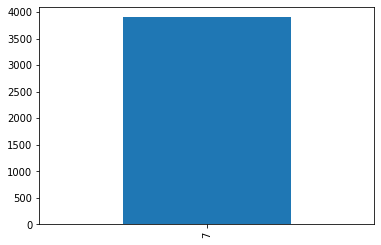

In [ ]:
short_tweets['month'].value_counts().plot(kind='bar')


In [ ]:
short_tweets[short_tweets['month']==2020]['text']

Series([], Name: text, dtype: object)

In [ ]:
text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')


In [ ]:
text

0       RT @LiZaAki_: Παναθηναϊκος μπορει να μην ειμαι...
1       RT @4fABkkc5xTv2aek: "Στην Ελλαδα του 21ου αιω...
2       RT @FKbXDaCt2HDL3sp: ρε πως τους προσγειωσε ετ...
3       @Angelo4everfree Τα αντισωματα που δημιουργεις...
4       RT @AntiDraseis: Ειμαι πληρως εμβολιασμενη και...
                              ...                        
3895    RT @almayadeen_es: Advierte la ONU que 41 mill...
3896    RT @ANI: Despite COVID19, the highest ever FDI...
3897    RT @NewsMobileIndia: All You Need To Know Abou...
3898    RT @Azlan_INC: Dunia belum selamat. UK, Korea ...
3899    God cannot be everywhere so he sent  #doctors ...
Name: text, Length: 3900, dtype: object

# **ΑΝΑΛΥΣΗ ΔΕΔΟΜΕΝΩΝ ΣΤΟ ΠΡΟΣΩΠΙΚΟ ΛΟΓΑΡΙΑΣΜΟ ΣΤΟ TWITTER ΤΟΥ ΥΠΟΥΡΓΟΥ ΥΓΕΙΑΣ Β.ΚΙΚΙΛΙΑ**

*Θέλοντας να φτάσουμε σε ορισμένα συμπεράσματα κρίθηκε αναγκαίο να "τραβήξουμε" τα tweets του Υπουργού Υγείας και να προχωρήσουμε σε μια ανάλυση συναισθημάτων, καθώς και να βρεθούν οι λέξεις που χρησιμοποιεί περισσότερο στις αναρτήσεις του.*

In [ ]:
import pandas as pd
import numpy as np 
!pip install Twython
from twython import Twython
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
OAUTH_TOKEN = ""
OAUTH_TOKEN_SECRET = ""
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweetsL = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='Vkikilias',count=300, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    tweetsL.append(tweet)
    
for tweet in tweetsL:
    if (len(tweet['full_text'])) > 50:
        print(tweet['full_text'], '\n')
all_text = ''
for tweet in tweetsL :
  all_text = all_text + ' ' + tweet['full_text']
len(all_text)

I Got: 200  tweets
RT @vdigalakis: Με την εμφάνιση της μετάλλαξης Δέλτα #COVID19 &amp; στην Κρήτη βρισκόμαστε σε μία κρίσιμη καμπή. Ο μόνος ασφαλής δρόμος για να… 

RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikilias στα Χανιά σήμερα, με ένα μήνυμα: #εμβολιασμος, ευθύνη και χρέος όλων μας. https://t.co/vZ… 

RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikilias επισκέφθηκε σήμερα τα 𝝬𝝰𝝼𝝸𝝰̍ για την εντατικοποίηση των εμβολιασμών στην 𝝟𝞀𝝶̍𝞃𝝶.
Αμέσως μ… 

«Η Κρήτη πρέπει να είναι πρωτοπόρος και στον εμβολιασμό».

Ευρεία σύσκεψη στο Επιμελητήριο Ρεθύμνου με όλους τους φορείς. 
⁦@mthemisto⁩ ⁦@CreteRegion⁩  https://t.co/DPIu0x17y0 

Περιφερειάρχης, Δήμαρχοι Λασιθίου, εκπρόσωποι παραγωγικών, επιστημονικών φορέων, τουριστικού κλάδου, της εκκλησίας, Διοικητές Νοσοκομείων στέλνουν κοινό μήνυμα από τον Άγιο Νικόλαο: όσο η μάχη των εμβολιασμών κερδίζεται τόσο η Κρήτη θα κερδίζει και τη μάχη του τουρισμού. https://t.co/rztdvIBgEa 

RT @AntennaNews: Κικίλιας: εμβολιασμοί από κινητές μονάδες σε χωριά και α

30280

In [ ]:
for tweet in tweetsL:
    print(tweet['created_at'],tweet['full_text'])

Fri Jul 02 06:26:43 +0000 2021 RT @vdigalakis: Με την εμφάνιση της μετάλλαξης Δέλτα #COVID19 &amp; στην Κρήτη βρισκόμαστε σε μία κρίσιμη καμπή. Ο μόνος ασφαλής δρόμος για να…
Thu Jul 01 18:36:42 +0000 2021 RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikilias στα Χανιά σήμερα, με ένα μήνυμα: #εμβολιασμος, ευθύνη και χρέος όλων μας. https://t.co/vZ…
Thu Jul 01 14:37:08 +0000 2021 RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikilias επισκέφθηκε σήμερα τα 𝝬𝝰𝝼𝝸𝝰̍ για την εντατικοποίηση των εμβολιασμών στην 𝝟𝞀𝝶̍𝞃𝝶.
Αμέσως μ…
Thu Jul 01 11:35:41 +0000 2021 «Η Κρήτη πρέπει να είναι πρωτοπόρος και στον εμβολιασμό».

Ευρεία σύσκεψη στο Επιμελητήριο Ρεθύμνου με όλους τους φορείς. 
⁦@mthemisto⁩ ⁦@CreteRegion⁩  https://t.co/DPIu0x17y0
Thu Jul 01 10:58:18 +0000 2021 https://t.co/dNt3m1pdzr
Wed Jun 30 19:08:16 +0000 2021 Περιφερειάρχης, Δήμαρχοι Λασιθίου, εκπρόσωποι παραγωγικών, επιστημονικών φορέων, τουριστικού κλάδου, της εκκλησίας, Διοικητές Νοσοκομείων στέλνουν κοινό μήνυμα από τον Άγιο Νικόλαο: όσο η 

In [ ]:

import nltk #για Επεξεργασία φυσικής γλώσσας Natural Language Toolkit

import matplotlib.pyplot as plt #Για γραφικά
import wordcloud #Για word clouds
import numpy as np 
import scipy #Για διαφορές και αποστάσεις
import seaborn as sns #κάνει τα γραφήματα (plot) πιο όμορφα
import sklearn.manifold #Για manifold plot
from nltk.corpus import stopwords #Για stopwords
import json #Για API responses
import urllib.parse #Για ένωση urls

%matplotlib inline

from textblob import TextBlob

In [ ]:
import numpy as np
import pandas as pd


In [ ]:

tweets_df = pd.DataFrame(tweetsL)
tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Fri Jul 02 06:26:43 +0000 2021,1410847385845211139,1410847385845211139,RT @vdigalakis: Με την εμφάνιση της μετάλλαξης...,False,"[0, 143]","{'hashtags': [{'text': 'COVID19', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,{'created_at': 'Thu Jul 01 19:37:47 +0000 2021...,False,4,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Jul 01 18:36:42 +0000 2021,1410668704594120705,1410668704594120705,RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikil...,False,"[0, 140]","{'hashtags': [{'text': 'εμβολιασμος', 'indices...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,{'created_at': 'Thu Jul 01 18:35:49 +0000 2021...,False,6,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Jul 01 14:37:08 +0000 2021,1410608414049247239,1410608414049247239,RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikil...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,{'created_at': 'Thu Jul 01 14:36:23 +0000 2021...,False,17,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Jul 01 11:35:41 +0000 2021,1410562751752282115,1410562751752282115,«Η Κρήτη πρέπει να είναι πρωτοπόρος και στον ε...,False,"[0, 175]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,NaN,False,19,92,False,False,el,False,NaN,NaN,NaN,NaN,NaN
4,Thu Jul 01 10:58:18 +0000 2021,1410553344351944706,1410553344351944706,https://t.co/dNt3m1pdzr,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,NaN,False,6,25,False,False,und,False,NaN,NaN,NaN,NaN,NaN


In [ ]:
for tweet in tweetsL:
    print(tweet['created_at'],tweet['full_text'])

Fri Jul 02 06:26:43 +0000 2021 RT @vdigalakis: Με την εμφάνιση της μετάλλαξης Δέλτα #COVID19 &amp; στην Κρήτη βρισκόμαστε σε μία κρίσιμη καμπή. Ο μόνος ασφαλής δρόμος για να…
Thu Jul 01 18:36:42 +0000 2021 RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikilias στα Χανιά σήμερα, με ένα μήνυμα: #εμβολιασμος, ευθύνη και χρέος όλων μας. https://t.co/vZ…
Thu Jul 01 14:37:08 +0000 2021 RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikilias επισκέφθηκε σήμερα τα 𝝬𝝰𝝼𝝸𝝰̍ για την εντατικοποίηση των εμβολιασμών στην 𝝟𝞀𝝶̍𝞃𝝶.
Αμέσως μ…
Thu Jul 01 11:35:41 +0000 2021 «Η Κρήτη πρέπει να είναι πρωτοπόρος και στον εμβολιασμό».

Ευρεία σύσκεψη στο Επιμελητήριο Ρεθύμνου με όλους τους φορείς. 
⁦@mthemisto⁩ ⁦@CreteRegion⁩  https://t.co/DPIu0x17y0
Thu Jul 01 10:58:18 +0000 2021 https://t.co/dNt3m1pdzr
Wed Jun 30 19:08:16 +0000 2021 Περιφερειάρχης, Δήμαρχοι Λασιθίου, εκπρόσωποι παραγωγικών, επιστημονικών φορέων, τουριστικού κλάδου, της εκκλησίας, Διοικητές Νοσοκομείων στέλνουν κοινό μήνυμα από τον Άγιο Νικόλαο: όσο η 

In [ ]:
import nltk #για Επεξεργασία φυσικής γλώσσας Natural Language Toolkit

import matplotlib.pyplot as plt #Για γραφικά
import wordcloud #Για word clouds
import numpy as np 
import scipy #Για διαφορές και αποστάσεις
import seaborn as sns #κάνει τα γραφήματα (plot) πιο όμορφα
import sklearn.manifold #Για manifold plot
from nltk.corpus import stopwords #Για stopwords
import json #Για API responses
import urllib.parse #Για ένωση urls

%matplotlib inline

from textblob import TextBlob

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
tweets_df = pd.DataFrame(tweetsL)
tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Fri Jul 02 06:26:43 +0000 2021,1410847385845211139,1410847385845211139,RT @vdigalakis: Με την εμφάνιση της μετάλλαξης...,False,"[0, 143]","{'hashtags': [{'text': 'COVID19', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,{'created_at': 'Thu Jul 01 19:37:47 +0000 2021...,False,4,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Jul 01 18:36:42 +0000 2021,1410668704594120705,1410668704594120705,RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikil...,False,"[0, 140]","{'hashtags': [{'text': 'εμβολιασμος', 'indices...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,{'created_at': 'Thu Jul 01 18:35:49 +0000 2021...,False,6,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
2,Thu Jul 01 14:37:08 +0000 2021,1410608414049247239,1410608414049247239,RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikil...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,{'created_at': 'Thu Jul 01 14:36:23 +0000 2021...,False,17,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
3,Thu Jul 01 11:35:41 +0000 2021,1410562751752282115,1410562751752282115,«Η Κρήτη πρέπει να είναι πρωτοπόρος και στον ε...,False,"[0, 175]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,NaN,False,19,92,False,False,el,False,NaN,NaN,NaN,NaN,NaN
4,Thu Jul 01 10:58:18 +0000 2021,1410553344351944706,1410553344351944706,https://t.co/dNt3m1pdzr,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 54283324, 'id_str': '54283324', 'name':...",None,None,None,None,NaN,False,6,25,False,False,und,False,NaN,NaN,NaN,NaN,NaN


In [ ]:
tweetsL[1]['full_text']

'RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikilias στα Χανιά σήμερα, με ένα μήνυμα: #εμβολιασμος, ευθύνη και χρέος όλων μας. https://t.co/vZ…'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
tweets_df.to_csv("/gdrive/My Drive/Colab Notebooks/kikilias.tsv", sep='\t')

In [ ]:
tweets_df2 =pd.read_csv("/gdrive/My Drive/Colab Notebooks/kikilias.tsv", sep='\t')

In [ ]:
L_tweets = tweets_df2.to_dict('records')


In [ ]:
L_short_tweets = []

for tweet in L_tweets:
    date = tweet['created_at']
    text = tweet['full_text']
    short_tweet = {'date': date, 'text':text, 'user': 'Vkikilias'}
    L_short_tweets.append(short_tweet)

L_short_tweets[0:5]

[{'date': 'Fri Jul 02 06:26:43 +0000 2021',
  'text': 'RT @vdigalakis: Με την εμφάνιση της μετάλλαξης Δέλτα #COVID19 &amp; στην Κρήτη βρισκόμαστε σε μία κρίσιμη καμπή. Ο μόνος ασφαλής δρόμος για να…',
  'user': 'Vkikilias'},
 {'date': 'Thu Jul 01 18:36:42 +0000 2021',
  'text': 'RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikilias στα Χανιά σήμερα, με ένα μήνυμα: #εμβολιασμος, ευθύνη και χρέος όλων μας. https://t.co/vZ…',
  'user': 'Vkikilias'},
 {'date': 'Thu Jul 01 14:37:08 +0000 2021',
  'text': 'RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikilias επισκέφθηκε σήμερα τα 𝝬𝝰𝝼𝝸𝝰̍ για την εντατικοποίηση των εμβολιασμών στην 𝝟𝞀𝝶̍𝞃𝝶.\nΑμέσως μ…',
  'user': 'Vkikilias'},
 {'date': 'Thu Jul 01 11:35:41 +0000 2021',
  'text': '«Η Κρήτη πρέπει να είναι πρωτοπόρος και στον εμβολιασμό».\n\nΕυρεία σύσκεψη στο Επιμελητήριο Ρεθύμνου με όλους τους φορείς. \n\u2066@mthemisto\u2069 \u2066@CreteRegion\u2069  https://t.co/DPIu0x17y0',
  'user': 'Vkikilias'},
 {'date': 'Thu Jul 01 10:58:18 +0000 2021',
  'tex

In [ ]:
short_tweets = pd.DataFrame(L_short_tweets)

short_tweets.tail()

,date,text,user
195,Fri Apr 30 15:42:53 +0000 2021,RT @YpYgGR: Καλή Ανάσταση και Καλό Πάσχα!\n\n🚑...,Vkikilias
196,Fri Apr 30 14:46:10 +0000 2021,RT @gpatoulis: Συνάντηση εργασίας στην #Περιφέ...,Vkikilias
197,Thu Apr 29 14:24:18 +0000 2021,ECDC: Για δεύτερη συνεχόμενη εβδομάδα στο πράσ...,Vkikilias
198,Thu Apr 29 09:04:23 +0000 2021,Μέχρι τις 30 Ιουνίου θα μπορεί να εμβολιαστεί ...,Vkikilias
199,Thu Apr 29 08:59:51 +0000 2021,RT @YpYgGR: Ηλικιακή Ομάδα 40-44 #σηκωνουμε_μα...,Vkikilias


In [ ]:

short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")
short_tweets['text']

0      RT @vdigalakis: Με την εμφάνιση της μετάλλαξης...
1      RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikil...
2      RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikil...
3      «Η Κρήτη πρέπει να είναι πρωτοπόρος και στον ε...
4                                                       
                             ...                        
195    RT @YpYgGR: Καλή Ανάσταση και Καλό Πάσχα!\n\n🚑...
196    RT @gpatoulis: Συνάντηση εργασίας στην #Περιφέ...
197    ECDC: Για δεύτερη συνεχόμενη εβδομάδα στο πράσ...
198    Μέχρι τις 30 Ιουνίου θα μπορεί να εμβολιαστεί ...
199    RT @YpYgGR: Ηλικιακή Ομάδα 40-44 #σηκωνουμε_μα...
Name: text, Length: 200, dtype: object

*Αναλυτικά τα tweets που έγιναν από τον μήνα Μάρτιο μέχρι σήμερα*

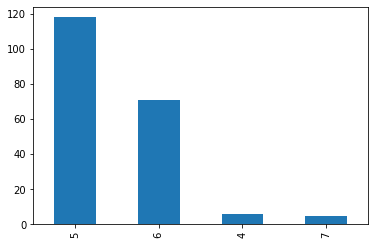

In [ ]:
short_tweets['month'].value_counts().plot(kind='bar')

In [ ]:

short_tweets[short_tweets['year']==2021]['text']

0      RT @vdigalakis: Με την εμφάνιση της μετάλλαξης...
1      RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikil...
2      RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikil...
3      «Η Κρήτη πρέπει να είναι πρωτοπόρος και στον ε...
4                                                       
                             ...                        
195    RT @YpYgGR: Καλή Ανάσταση και Καλό Πάσχα!\n\n🚑...
196    RT @gpatoulis: Συνάντηση εργασίας στην #Περιφέ...
197    ECDC: Για δεύτερη συνεχόμενη εβδομάδα στο πράσ...
198    Μέχρι τις 30 Ιουνίου θα μπορεί να εμβολιαστεί ...
199    RT @YpYgGR: Ηλικιακή Ομάδα 40-44 #σηκωνουμε_μα...
Name: text, Length: 200, dtype: object

In [ ]:
text = short_tweets[short_tweets['year']==2021]['text'].str.cat(sep = ' ').replace("amp", ' ')
text

'RT @vdigalakis: Με την εμφάνιση της μετάλλαξης Δέλτα #COVID19 & ; στην Κρήτη βρισκόμαστε σε μία κρίσιμη καμπή. Ο μόνος ασφαλής δρόμος για να… RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikilias στα Χανιά σήμερα, με ένα μήνυμα: #εμβολιασμος, ευθύνη και χρέος όλων μας.   RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikilias επισκέφθηκε σήμερα τα 𝝬𝝰𝝼𝝸𝝰̍ για την εντατικοποίηση των εμβολιασμών στην 𝝟𝞀𝝶̍𝞃𝝶.\nΑμέσως μ… «Η Κρήτη πρέπει να είναι πρωτοπόρος και στον εμβολιασμό».\n\nΕυρεία σύσκεψη στο Επιμελητήριο Ρεθύμνου με όλους τους φορείς. \n\u2066@mthemisto\u2069 \u2066@CreteRegion\u2069      Περιφερειάρχης, Δήμαρχοι Λασιθίου, εκπρόσωποι παραγωγικών, επιστημονικών φορέων, τουριστικού κλάδου, της εκκλησίας, Διοικητές Νοσοκομείων στέλνουν κοινό μήνυμα από τον Άγιο Νικόλαο: όσο η μάχη των εμβολιασμών κερδίζεται τόσο η Κρήτη θα κερδίζει και τη μάχη του τουρισμού.   RT @AntennaNews: Κικίλιας: εμβολιασμοί από κινητές μονάδες σε χωριά και απομακρυσμένες περιοχές   Από 6 Ιουλίου: Εμβολιασμοί από Κινητές

In [ ]:
tweet = text


TextBlob(tweet).sentiment

Sentiment(polarity=0.3039354482323232, subjectivity=0.564888888888889)

**WORDCLOUD**

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
stopwords = set(STOPWORDS) 
list(STOPWORDS)[0:10]

['k', 'can', 'are', "he'd", 'shall', 'over', 'with', 'you', 'these', 'until']

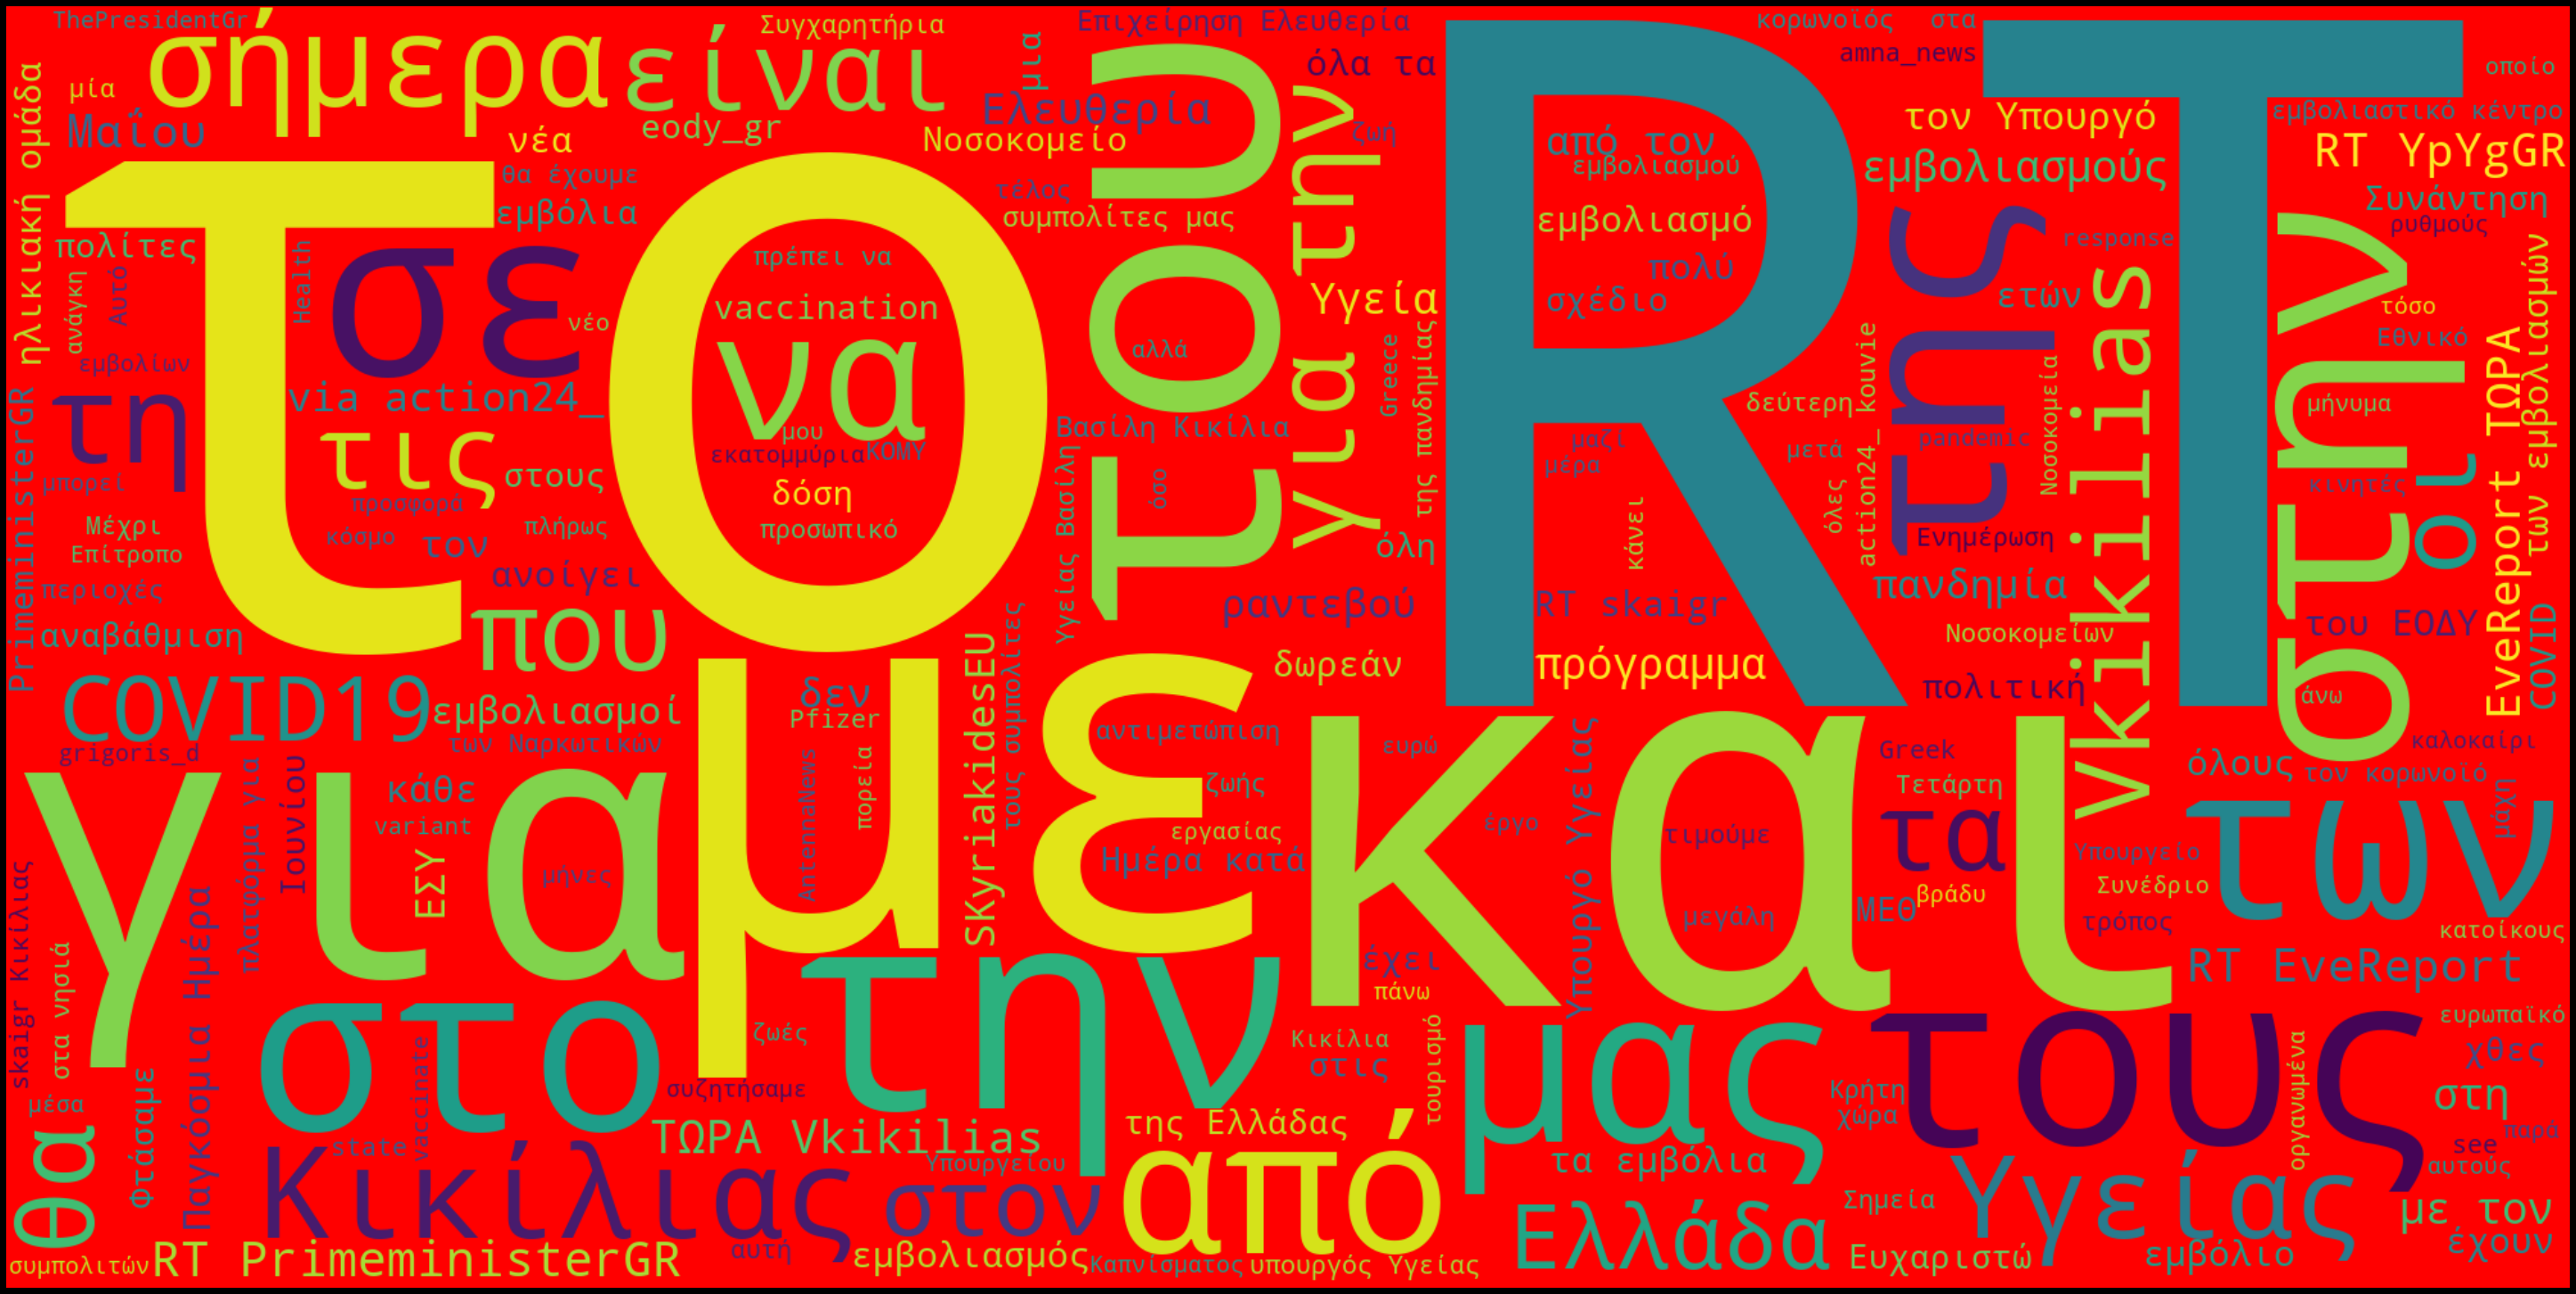

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'red'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

text = text.replace('RT', " ")
text = text.replace('whoemro', " ")
text = text.replace('edros', " ")
text = text.replace('whowpro', " ")
text = text.replace('whosearo', " ")
text = text.replace('WHOSEARO', " ")
text = text.replace('https', " ")
text = text.replace('DrTedros'," ")
text = text.replace('DrT'," ")
text = text.replace('Dr T'," ")

# **COUNT VECTORIZER**




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_vector = cv.fit_transform(short_tweets['text'])

In [ ]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:10]

['όπου',
 'τούτου',
 'ίσαμε',
 'μήπως',
 'πολύ',
 'κάμποσο',
 'στη',
 'έχετε',
 'πολλοί',
 'αυτόν']

In [ ]:
doc = nlp(short_tweets['text'][1])


In [ ]:
for token in doc:
    print(token, token.lemma_)

RT rt
@MVoloudakis @mvoloudakis
: :
Με με
τον τον
Υπουργό υπουργό
Υγείας υγεία
@Vkikilias @vkikilias
στα στα
Χανιά Χανιά
σήμερα σήμερα
, ,
με με
ένα ένα
μήνυμα μήνυμας
: :
# #
εμβολιασμος εμβολιασμος
, ,
ευθύνη ευθύνη
και και
χρέος χρέος
όλων όλος
μας μας
. .
   


In [ ]:
' '.join(token.lemma_ for token in doc)

'rt @mvoloudakis : με τον υπουργό υγεία @vkikilias στα Χανιά σήμερα , με ένα μήνυμας : # εμβολιασμος , ευθύνη και χρέος όλος μας .  '

In [ ]:
full_doc = nlp(text)
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]


'ανιά σήμερα , με ένα μήνυμας : # εμβολιασμος , ευθύνη και χρέος όλος μας .      @dora_bakoyannis : ο υπουργός υγεία @Vkikilias επισκέφθηκε σήμερα τα 𝝬𝝰𝝼𝝸𝝰̍ για την εντατικοποίηση των εμβολιασμών στην '

In [ ]:

count_vector.shape

(200, 1477)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 


In [ ]:
results.head()

,000,05,100,102,108,111,112,12,120,13,14,141,15,150,1500,16,170,18,18ανω,19,1η,1ος,20,20ο,21,21ου,24,25,26,280,29,2η,30,300,34,35,39,40,420,43,...,χώρα,χώρας,χώρες,χώρο,ψηφίσαμε,ψηφιακά,ψηφιακές,ψηφιακή,ψηφιακό,ψηφιακός,ψυχής,ψυχικής,ωραία,ως,ωφελούμενους,ωφελούμενων,όλ,όλα,όλες,όλη,όλοι,όλους,όλων,όποιος,όπως,όρθια,όρθιο,όσα,όσο,όσοι,όταν,ότι,ύψος,ύψους,ώρα,ώρες,ώστε,𝝟𝞀𝝶,𝝬𝝰𝝼𝝸𝝰,𝞃𝝶
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

cv.vocabulary_

{'rt': 301,
 'vdigalakis': 356,
 'με': 969,
 'την': 1324,
 'εμφάνιση': 719,
 'της': 1325,
 'μετάλλαξης': 979,
 'δέλτα': 578,
 'covid19': 113,
 'amp': 68,
 'στην': 1249,
 'κρήτη': 924,
 'βρισκόμαστε': 558,
 'σε': 1220,
 'μία': 960,
 'κρίσιμη': 925,
 'καμπή': 877,
 'μόνος': 1013,
 'ασφαλής': 520,
 'δρόμος': 635,
 'για': 568,
 'να': 1021,
 'mvoloudakis': 240,
 'τον': 1335,
 'υπουργό': 1391,
 'υγείας': 1364,
 'vkikilias': 363,
 'στα': 1245,
 'χανιά': 1420,
 'σήμερα': 1218,
 'ένα': 408,
 'μήνυμα': 959,
 'εμβολιασμος': 703,
 'ευθύνη': 793,
 'και': 865,
 'χρέος': 1427,
 'όλων': 1459,
 'μας': 967,
 'dora_bakoyannis': 127,
 'υπουργός': 1392,
 'επισκέφθηκε': 767,
 'τα': 1308,
 '𝝬𝝰𝝼𝝸𝝰': 1475,
 'εντατικοποίηση': 734,
 'των': 1358,
 'εμβολιασμών': 708,
 '𝝟𝞀𝝶': 1474,
 '𝞃𝝶': 1476,
 'αμέσως': 454,
 'πρέπει': 1157,
 'είναι': 644,
 'πρωτοπόρος': 1189,
 'στον': 1257,
 'εμβολιασμό': 706,
 'ευρεία': 794,
 'σύσκεψη': 1300,
 'στο': 1254,
 'επιμελητήριο': 764,
 'ρεθύμνου': 1209,
 'όλους': 1458,
 'τους': 1349,

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)


In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])


In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,100,13,15,150,16,18,19,20,21ου,24,25,29,30,34,35,39,40,420,44,70,74η,action24_,amna_news,amp,and,antennanews,astrazeneca,biontech,bravo,by,can,covid,covid19,delphi_forum,delta,eeathina,elenasagiadinou,eody_gr,evereport,...,συνέδριο,συνέλευση,συνεπείς,συνεχίζουμε,σχέδιο,σχέση,σχολεία,σύρου,σύσκεψη,σύστημα,τέλος,τείχος,τετάρτη,τιμούμε,τουρίστες,τουρισμού,τουρισμό,τροφίμων,τρόπος,τω,τωρα,υγεία,υγείας,υγειονομικοί,υγειονομικούς,υπουργείο,υπουργείου,υπουργό,υπουργός,φροντίδας,φτάσαμε,φωτογραφίας,χθες,χιλιάδες,χρόνια,χωριά,χώρα,ψηφιακά,ψυχικής,ωφελούμενους
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστας', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτή', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτά', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιής', 'ποιώ', 'πολλός', 'προχθά', 'προχτή', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,\n\n,\n,.@vkikilias,18-25,21ου,25-29,35-39,4.000,40-44,5.000.000,74η,@action24,@amna_news,@antennanews,@delphi_forum,@eeathina,@elenasagiadinou,@eody_gr,@evereport,@govgr,@grigoris_d,@hans_kluge,@kathimerini_gr,@kouvie,@makisvoridis,@okana_gr,@pierrakakis,@primeministergr,@real_gr,@skaigr,@skyriakideseu,@steftsitsipas,@thepresidentgr,@usambpyatt,@vkikilias,@who,@ypyggr,and,astrazeneca,biontech,...,συνεπείς,συνεχίζω,σχέδιο,σχέση,σχολείο,σύσκεψη,σύστημα,σώσω,τέλος,τείχος,τετάρτη,τιμή,τιμούμε,τοπικός,τουρίστα,τουρισμό,τουρισμός,τουριστικός,τροφίμο,τρόπος,τωρο,υγεία,υγειονομικού,υγειονομικός,υπάρχω,υπουργείο,υπουργό,υπουργός,φροντίδα,φτάσαμε,φωτογραφία,χαρά,χθες,χιλιάδες,χρόνια,χωρί,χώρα,ψηφιακά,ψηφιακός,ψυχικός
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,000,action24_,amp,covid19,evereport,primeministergr,rt,the,to,vkikilias,ypyggr,ελευθερία,ελλάδα,εμβόλια,ημέρα,κικίλιας,μαΐου,σήμερα,τωρα,υγείας
0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b' , tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστας', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτή', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτά', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιής', 'ποιώ', 'πολλός', 'προχθά', 'προχτή', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,\n\n,@action24,@evereport,@primeministergr,@vkikilias,covid19,the,ελευθερία,ελλάδα,εμβολιασμό,εμβολιασμός,εμβόλιο,ημέρα,κικίλια,νέος,νοσοκομείο,ομάδα,πανδημία,σήμερα,υγεία
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,action24_ amp,amp kouvie,evereport τωρα,rt amna_news,rt evereport,rt primeministergr,rt skaigr,rt skyriakideseu,rt ypyggr,skaigr κικίλιας,via action24_,βασίλη κικίλια,επιχείρηση ελευθερία,ηλικιακή ομάδα,παγκόσμια ημέρα,τωρα vkikilias,υγείας vkikilias,υγείας βασίλη,υπουργό υγείας,υπουργός υγείας
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

rt primeministergr      11
evereport τωρα          10
τωρα vkikilias          10
rt ypyggr               10
rt evereport            10
via action24_            8
παγκόσμια ημέρα          7
action24_ amp            6
ηλικιακή ομάδα           6
υπουργό υγείας           6
rt skaigr                6
υγείας vkikilias         5
επιχείρηση ελευθερία     5
βασίλη κικίλια           5
rt skyriakideseu         5
amp kouvie               4
υπουργός υγείας          4
rt amna_news             4
υγείας βασίλη            4
skaigr κικίλιας          4
dtype: int64

In [ ]:

sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

rt primeministergr    11
evereport τωρα        10
τωρα vkikilias        10
rt ypyggr             10
rt evereport          10
dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re


import nltk
from nltk.corpus import stopwords


In [ ]:
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/kikilias.tsv", sep='\t', nrows=200)
df

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,0,Fri Jul 02 06:26:43 +0000 2021,1410847385845211139,1410847385845211139,RT @vdigalakis: Με την εμφάνιση της μετάλλαξης...,False,"[0, 143]","{'hashtags': [{'text': 'COVID19', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,{'created_at': 'Thu Jul 01 19:37:47 +0000 2021...,False,4,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Thu Jul 01 18:36:42 +0000 2021,1410668704594120705,1410668704594120705,RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikil...,False,"[0, 140]","{'hashtags': [{'text': 'εμβολιασμος', 'indices...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,{'created_at': 'Thu Jul 01 18:35:49 +0000 2021...,False,6,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Thu Jul 01 14:37:08 +0000 2021,1410608414049247239,1410608414049247239,RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikil...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,{'created_at': 'Thu Jul 01 14:36:23 +0000 2021...,False,17,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Thu Jul 01 11:35:41 +0000 2021,1410562751752282115,1410562751752282115,«Η Κρήτη πρέπει να είναι πρωτοπόρος και στον ε...,False,"[0, 175]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,NaN,False,19,92,False,False,el,False,NaN,NaN,NaN,NaN,NaN
4,4,Thu Jul 01 10:58:18 +0000 2021,1410553344351944706,1410553344351944706,https://t.co/dNt3m1pdzr,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,NaN,False,6,25,False,False,und,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,Fri Apr 30 15:42:53 +0000 2021,1388156912471089156,1388156912471089156,RT @YpYgGR: Καλή Ανάσταση και Καλό Πάσχα!\n\n🚑...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,{'created_at': 'Fri Apr 30 15:41:55 +0000 2021...,False,32,0,False,False,el,False,"{'media': [{'id': 1388156573047009280, 'id_str...",NaN,NaN,NaN,NaN
196,196,Fri Apr 30 14:46:10 +0000 2021,1388142639833358343,1388142639833358343,RT @gpatoulis: Συνάντηση εργασίας στην #Περιφέ...,False,"[0, 139]","{'hashtags': [{'text': 'Περιφέρεια_Αττικής', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,{'created_at': 'Fri Apr 30 14:45:57 +0000 2021...,False,6,0,False,False,el,NaN,NaN,NaN,NaN,NaN,NaN
197,197,Thu Apr 29 14:24:18 +0000 2021,1387774751326838786,1387774751326838786,ECDC: Για δεύτερη συνεχόμενη εβδομάδα στο πράσ...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 54283324, 'id_str': '54283324', 'name':...",NaN,NaN,NaN,NaN,NaN,False,46,203,False,False,el,False,NaN,NaN,NaN,NaN,NaN
198,198,Thu Apr 29 09:04:23 +0000

In [ ]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [ ]:

df.shape
print("Number of articles scraped (before cleaning): ", df.shape[0])

Number of articles scraped (before cleaning):  200


In [ ]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df.shape

(200, 32)

In [ ]:
df = df.replace(np.nan, '0')
df

,Unnamed: 0,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,0,Fri Jul 02 06:26:43 +0000 2021,1410847385845211139,1410847385845211139,RT @vdigalakis: Με την εμφάνιση της μετάλλαξης...,False,"[0, 143]","{'hashtags': [{'text': 'COVID19', 'indices': [...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,0,"{'id': 54283324, 'id_str': '54283324', 'name':...",0,0,0,0,{'created_at': 'Thu Jul 01 19:37:47 +0000 2021...,False,4,0,False,False,el,0,0,0,0,0,0
1,1,Thu Jul 01 18:36:42 +0000 2021,1410668704594120705,1410668704594120705,RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikil...,False,"[0, 140]","{'hashtags': [{'text': 'εμβολιασμος', 'indices...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,0,"{'id': 54283324, 'id_str': '54283324', 'name':...",0,0,0,0,{'created_at': 'Thu Jul 01 18:35:49 +0000 2021...,False,6,0,False,False,el,0,0,0,0,0,0
2,2,Thu Jul 01 14:37:08 +0000 2021,1410608414049247239,1410608414049247239,RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikil...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,0,"{'id': 54283324, 'id_str': '54283324', 'name':...",0,0,0,0,{'created_at': 'Thu Jul 01 14:36:23 +0000 2021...,False,17,0,False,False,el,0,0,0,0,0,0
3,3,Thu Jul 01 11:35:41 +0000 2021,1410562751752282115,1410562751752282115,«Η Κρήτη πρέπει να είναι πρωτοπόρος και στον ε...,False,"[0, 175]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,0,"{'id': 54283324, 'id_str': '54283324', 'name':...",0,0,0,0,0,False,19,92,False,False,el,False,0,0,0,0,0
4,4,Thu Jul 01 10:58:18 +0000 2021,1410553344351944706,1410553344351944706,https://t.co/dNt3m1pdzr,False,"[0, 23]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,0,"{'id': 54283324, 'id_str': '54283324', 'name':...",0,0,0,0,0,False,6,25,False,False,und,False,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,Fri Apr 30 15:42:53 +0000 2021,1388156912471089156,1388156912471089156,RT @YpYgGR: Καλή Ανάσταση και Καλό Πάσχα!\n\n🚑...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,0,"{'id': 54283324, 'id_str': '54283324', 'name':...",0,0,0,0,{'created_at': 'Fri Apr 30 15:41:55 +0000 2021...,False,32,0,False,False,el,False,"{'media': [{'id': 1388156573047009280, 'id_str...",0,0,0,0
196,196,Fri Apr 30 14:46:10 +0000 2021,1388142639833358343,1388142639833358343,RT @gpatoulis: Συνάντηση εργασίας στην #Περιφέ...,False,"[0, 139]","{'hashtags': [{'text': 'Περιφέρεια_Αττικής', '...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,0,"{'id': 54283324, 'id_str': '54283324', 'name':...",0,0,0,0,{'created_at': 'Fri Apr 30 14:45:57 +0000 2021...,False,6,0,False,False,el,0,0,0,0,0,0
197,197,Thu Apr 29 14:24:18 +0000 2021,1387774751326838786,1387774751326838786,ECDC: Για δεύτερη συνεχόμενη εβδομάδα στο πράσ...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,0,"{'id': 54283324, 'id_str': '54283324', 'name':...",0,0,0,0,0,False,46,203,False,False,el,False,0,0,0,0,0
198,198,Thu Apr 29 09:04:23 +0000 2021,1387694240847876096,1387694240847876096,Μέχρι τις 30 Ιουνίου θα μπορεί να εμβολιαστεί ...,False,"[0, 158]","{'hashtags': [{'text': 'skai', 'indices': [102...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,0,"{'id':

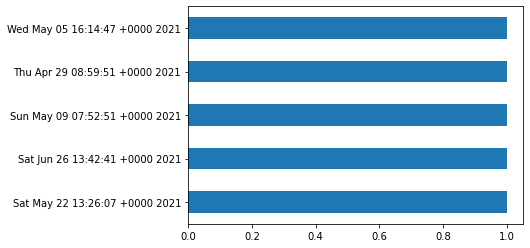

In [ ]:
#df['created_at'].value_counts().head(10)
%matplotlib inline
df['created_at'].value_counts().head(5).sort_values().plot(kind='barh')

# **Greek sentiment analysis (lexicon)**

In [ ]:

!python -m spacy download el_core_news_md



✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:

import spacy
from spacy import displacy
import pandas as pd
from collections import defaultdict
import operator

In [ ]:
indexes = {}
df = pd.read_csv('https://raw.githubusercontent.com/cmourlas/DataAnalysisPython/master/lexicons/greek_sentiment_lexicon.tsv',sep='\t')
df = df.fillna('N/A')

In [ ]:
for index, row in df.iterrows():
    df.at[index, "Term"] = row["Term"].split(' ')[0]
    indexes[df.at[index, "Term"]] = index

In [ ]:
text= short_tweets['text'].str.cat(sep = ' ').replace("amp", ' ')

text


'RT @vdigalakis: Με την εμφάνιση της μετάλλαξης Δέλτα #COVID19 & ; στην Κρήτη βρισκόμαστε σε μία κρίσιμη καμπή. Ο μόνος ασφαλής δρόμος για να… RT @MVoloudakis: Με τον Υπουργό Υγείας @Vkikilias στα Χανιά σήμερα, με ένα μήνυμα: #εμβολιασμος, ευθύνη και χρέος όλων μας.   RT @Dora_Bakoyannis: Ο υπουργός Υγείας @Vkikilias επισκέφθηκε σήμερα τα 𝝬𝝰𝝼𝝸𝝰̍ για την εντατικοποίηση των εμβολιασμών στην 𝝟𝞀𝝶̍𝞃𝝶.\nΑμέσως μ… «Η Κρήτη πρέπει να είναι πρωτοπόρος και στον εμβολιασμό».\n\nΕυρεία σύσκεψη στο Επιμελητήριο Ρεθύμνου με όλους τους φορείς. \n\u2066@mthemisto\u2069 \u2066@CreteRegion\u2069      Περιφερειάρχης, Δήμαρχοι Λασιθίου, εκπρόσωποι παραγωγικών, επιστημονικών φορέων, τουριστικού κλάδου, της εκκλησίας, Διοικητές Νοσοκομείων στέλνουν κοινό μήνυμα από τον Άγιο Νικόλαο: όσο η μάχη των εμβολιασμών κερδίζεται τόσο η Κρήτη θα κερδίζει και τη μάχη του τουρισμού.   RT @AntennaNews: Κικίλιας: εμβολιασμοί από κινητές μονάδες σε χωριά και απομακρυσμένες περιοχές   Από 6 Ιουλίου: Εμβολιασμοί από Κινητές

In [ ]:
subj_scores = {
    'OBJ': 0,
    'SUBJ-': 0.5,
    'SUBJ+': 1,
}

emotion_scores = {
    'N/A': 0,
    '1.0': 0.2,
    '2.0': 0.4,
    '3.0': 0.6,
    '4.0': 0.8,
    '5.0': 1,
}

polarity_scores = {
    'N/A': 0,
    'BOTH': 0,
    'NEG': -1,
    'POS': 1
}

In [ ]:
nlp = spacy.load('el_core_news_md')
doc = nlp(text)

In [ ]:
subjectivity_score = 0
anger_score = 0
disgust_score = 0
fear_score =  0
happiness_score = 0
sadness_score = 0
surprise_score = 0
polarity_score = 0
matched_tokens = 0
for token in doc:
    lemmatized_token = token.lemma_
    if (lemmatized_token in indexes):
        indx = indexes[lemmatized_token]
        pos_flag = False
        for col in ["POS1", "POS2", "POS3", "POS4"]:
            if (token.pos_ == df.at[indx,col]):
                pos_flag = True
                break
        if (pos_flag == True):
          match_col_index = [int(s) for s in col if s.isdigit()][0]
          subjectivity_score += subj_scores[df.at[indx,'Subjectivity'+str(match_col_index)]]
          anger_score += emotion_scores[str(df.at[indx, 'Anger'+str(match_col_index)])]
          disgust_score += emotion_scores[str(df.at[indx, 'Disgust'+str(match_col_index)])]
          fear_score += emotion_scores[str(df.at[indx, 'Fear'+str(match_col_index)])]
          happiness_score += emotion_scores[str(df.at[indx, 'Happiness'+str(match_col_index)])]
          sadness_score += emotion_scores[str(df.at[indx,'Sadness'+str(match_col_index)])]
          surprise_score += emotion_scores[str(df.at[indx, 'Surprise'+str(match_col_index)])]
          polarity_score += polarity_scores[str(df.at[indx, 'Polarity'+str(match_col_index)])]
          matched_tokens+=1

In [ ]:
try:
    print('Subjectivity: ' + str(subjectivity_score/matched_tokens * 100)+'%')
    emotions = {'anger': anger_score, 'disgust': disgust_score, 'fear':fear_score, 'happiness':happiness_score, 'sadness': sadness_score, 'surprise': surprise_score}
    emotion = max(emotions.items(), key=operator.itemgetter(1))[0]
    if (emotions[emotion] == 0):
        print('Unable to detect emotion')
    else:
        print('Main emotion: ' + emotion + '. Emotion score: ' + str(emotions[emotion]*100/matched_tokens) + '%')
        print('Polarity: ', polarity_score)
except:
    print('No matched tokens')

Subjectivity: 21.11111111111111%
Main emotion: surprise. Emotion score: 23.111111111111107%
Polarity:  7
